In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import h3
import shapely

In [2]:
import pandas as pd

# Load your CSV data
data = pd.read_csv(r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\Locomizer_latest_april_03.csv")

# LEPAVARA 89089968aabffff
# Helsinki 891126d33bbffff

# Filter rows where ORIGIN_Municipality == "Espoo" and DESTINATION_CODE9 == "891126d33bbffff"
filtered_data = data[(data['ORIGIN_Municipality'].isin(['Espoo', 'Kauniainen'])) & (data['DESTINATION_CODE9'] == '89089968aabffff')]

# Check for duplicate values in ORIGIN_CODE9
duplicates = filtered_data['ORIGIN_CODE9'].duplicated().sum()

# If there are duplicates, print the number of duplicates and display them
# if duplicates > 0:
#     print(f"Warning: There are {duplicates} duplicates in the 'ORIGIN_CODE9' column.")
#     # Display the rows with duplicate 'ORIGIN_CODE9' values
#     print(filtered_data[filtered_data['ORIGIN_CODE9'].duplicated(keep=False)])
# else:
#     print("No duplicates found in the 'ORIGIN_CODE9' column.")

# Display the filtered data
filtered_data.head()


,Unnamed: 0,ORIGIN_CODE9,DESTINATION_CODE9,EXTRAPOLATED_NUMBER_OF_USERS,car_dist,car_time,car_co2,pt_dist,pt_time,pt_co2,ORIGIN_Municipality,DESTINATION_Municipality,geometry,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer
287,287,89089961373ffff,89089968aabffff,111.17,17035.13,32.97,2647.94,17374,47.8,964.45,Espoo,Espoo,POLYGON ((24.648814937134176 60.25373794707187...,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08
445,445,8908996145bffff,89089968aabffff,110.67,19403.50,30.58,3016.08,16227,67.5,865.84,Espoo,Espoo,"POLYGON ((24.57038908029805 60.240883485656, 2...",POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,76,25,229.22,21.65
1107,1107,89089968067ffff,89089968aabffff,156.00,9527.55,20.75,1480.96,8986,32.7,453.89,Espoo,Espoo,"POLYGON ((24.7380371882135 60.19010880246306, ...",POLYGON ((24.809306299499685 60.21782603212683...,0.57,0.30,90,47,133.29,21.33
1248,1248,89089968083ffff,89089968aabffff,79.50,10469.42,26.24,1627.37,13474,50.7,697.36,Espoo,Espoo,POLYGON ((24.709472403014573 60.19083747445221...,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,55,18,89.51,12.55
2245,2245,89089968183ffff,89089968aabffff,94.00,8011.68,24.72,1245.34,5645,24.8,114.98,Kauniainen,Espoo,POLYGON ((24.724930852334342 60.20983464384855...,POLYGON ((24.809306299499685 60.21782603212683...,0.57,0.30,54,28,67.25,3.22


In [3]:
filtered_data.shape

(185, 20)

In [4]:
# Helsinki_Central_Railway_Station = shapely.Point(24.941521, 60.170666)
Lepavara_Railway_Station = shapely.Point(24.8115392,60.2192932)
destinations = gpd.GeoDataFrame(
        {
            "id": [1],
            "geometry": [Lepavara_Railway_Station]
        },
        crs="EPSG:4326",
)


In [5]:
dest_y, dest_x =  60.2192932, 24.8115392
destination_Point = Point(dest_x, dest_y)
destination_Point_df = gpd.GeoDataFrame({"geometry": [destination_Point], 
                                         "name": "Destination", 
                                         "id": [1]}, 
                                        index=[0], 
                                        crs="epsg:4326")

In [6]:
from h3 import h3

# Function to convert H3 index to lat-lon
def h3_to_latlon(h3_index):
    lat, lon = h3.h3_to_geo(h3_index)
    return lat, lon

# Create a copy of the filtered DataFrame
filtered_data = filtered_data.copy()

# Convert H3 codes to lat-lon
filtered_data['orig_lat'], filtered_data['orig_lon'] = zip(*filtered_data['ORIGIN_CODE9'].map(h3_to_latlon))


# Show the updated data
filtered_data.head()


,Unnamed: 0,ORIGIN_CODE9,DESTINATION_CODE9,EXTRAPOLATED_NUMBER_OF_USERS,car_dist,car_time,car_co2,pt_dist,pt_time,pt_co2,...,geometry,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
287,287,89089961373ffff,89089968aabffff,111.17,17035.13,32.97,2647.94,17374,47.8,964.45,...,POLYGON ((24.648814937134176 60.25373794707187...,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
445,445,8908996145bffff,89089968aabffff,110.67,19403.50,30.58,3016.08,16227,67.5,865.84,...,"POLYGON ((24.57038908029805 60.240883485656, 2...",POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,76,25,229.22,21.65,60.241901,24.572830
1107,1107,89089968067ffff,89089968aabffff,156.00,9527.55,20.75,1480.96,8986,32.7,453.89,...,"POLYGON ((24.7380371882135 60.19010880246306, ...",POLYGON ((24.809306299499685 60.21782603212683...,0.57,0.30,90,47,133.29,21.33,60.191123,24.740484
1248,1248,89089968083ffff,89089968aabffff,79.50,10469.42,26.24,1627.37,13474,50.7,697.36,...,POLYGON ((24.709472403014573 60.19083747445221...,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,55,18,89.51,12.55,60.191853,24.711917
2245,2245,89089968183ffff,89089968aabffff,94.00,8011.68,24.72,1245.34,5645,24.8,114.98,...,POLYGON ((24.724930852334342 60.20983464384855...,POLYGON ((24.809306299499685 60.21782603212683...,0.57,0.30,54,28,67.25,3.22,60.210850,24.727378


In [7]:
import geopandas as gpd
from shapely.geometry import Point

# Initialize empty lists to store individual origin and destination GeoDataFrames
origin_Point_df_list = []


# Loop over the filtered data and create GeoDataFrames for each origin and destination
for index, row in filtered_data.iterrows():
    # Origin point
    orig_y, orig_x = row['orig_lat'], row['orig_lon']
    origin_Point = Point(orig_x, orig_y)
    origin_Point_df = gpd.GeoDataFrame({
        "geometry": [origin_Point], 
        "name": ["Origin"], 
        "id": [index]}, 
        index=[index], 
        crs="epsg:4326")
    
    # Add the origin GeoDataFrame to the list
    origin_Point_df_list.append(origin_Point_df)
    
    # # Destination point
    # dest_y, dest_x = row['dest_lat'], row['dest_lon']
    # destination_Point = Point(dest_x, dest_y)
    # destination_Point_df = gpd.GeoDataFrame({
    #     "geometry": [destination_Point], 
    #     "name": ["Destination"], 
    #     "id": [index]}, 
    #     index=[index], 
    #     crs="epsg:4326")
    
    # # Add the destination GeoDataFrame to the list
    # destination_Point_df_list.append(destination_Point_df)

# Now concatenate the lists of GeoDataFrames to create final GeoDataFrames for origin and destination
origin_gdf = gpd.GeoDataFrame(pd.concat(origin_Point_df_list, ignore_index=True), crs="epsg:4326")
# destination_gdf = gpd.GeoDataFrame(pd.concat(destination_Point_df_list, ignore_index=True), crs="epsg:4326")

# Add an 'index' column to both GeoDataFrames
origin_gdf['index'] = origin_gdf.index
# destination_gdf['index'] = destination_gdf.index

# # Check for duplicate IDs and reset them if necessary
# if not origin_gdf['id'].is_unique:
#     print("Warning: Duplicate IDs in origin_gdf.")
#     origin_gdf = origin_gdf.reset_index(drop=True)
#     origin_gdf['id'] = origin_gdf.index

# if not destination_gdf['id'].is_unique:
#     print("Warning: Duplicate IDs in destination_gdf.")
#     destination_gdf = destination_gdf.reset_index(drop=True)
#     destination_gdf['id'] = destination_gdf.index

# Now you can check the updated GeoDataFrames
origin_Point_df.head()


,geometry,name,id
100612,POINT (24.83301 60.21505),Origin,100612


In [8]:
origin_gdf
# origin_gdf.explore(max_zoom=13, color="red", marker_kwds={"radius": 12})

,geometry,name,id,index
0,POINT (24.65126 60.25475),Origin,287,0
1,POINT (24.57283 60.2419),Origin,445,1
2,POINT (24.74048 60.19112),Origin,1107,2
3,POINT (24.71192 60.19185),Origin,1248,3
4,POINT (24.72738 60.21085),Origin,2245,4
...,...,...,...,...
180,POINT (24.58382 60.18351),Origin,62638,180
181,POINT (24.59699 60.18181),Origin,63065,181
182,POINT (24.83523 60.21777),Origin,100504,182
183,POINT (24.84037 60.21809),Origin,100536,183


In [11]:
# Create GeoDataFrame for the origins
origin_gdf_new = gpd.GeoDataFrame(filtered_data, 
                               geometry=[Point(lon, lat) for lon, lat in zip(filtered_data['orig_lon'], filtered_data['orig_lat'])],
                               crs="epsg:4326")

In [12]:
origin_gdf_new

,Unnamed: 0,ORIGIN_CODE9,DESTINATION_CODE9,EXTRAPOLATED_NUMBER_OF_USERS,car_dist,car_time,car_co2,pt_dist,pt_time,pt_co2,...,geometry,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
287,287,89089961373ffff,89089968aabffff,111.17,17035.13,32.97,2647.94,17374,47.8,964.45,...,POINT (24.65126 60.25475),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
445,445,8908996145bffff,89089968aabffff,110.67,19403.50,30.58,3016.08,16227,67.5,865.84,...,POINT (24.57283 60.2419),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,76,25,229.22,21.65,60.241901,24.572830
1107,1107,89089968067ffff,89089968aabffff,156.00,9527.55,20.75,1480.96,8986,32.7,453.89,...,POINT (24.74048 60.19112),POLYGON ((24.809306299499685 60.21782603212683...,0.57,0.30,90,47,133.29,21.33,60.191123,24.740484
1248,1248,89089968083ffff,89089968aabffff,79.50,10469.42,26.24,1627.37,13474,50.7,697.36,...,POINT (24.71192 60.19185),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,55,18,89.51,12.55,60.191853,24.711917
2245,2245,89089968183ffff,89089968aabffff,94.00,8011.68,24.72,1245.34,5645,24.8,114.98,...,POINT (24.72738 60.21085),POLYGON ((24.809306299499685 60.21782603212683...,0.57,0.30,54,28,67.25,3.22,60.210850,24.727378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62638,62638,89089979907ffff,89089968aabffff,118.25,19375.15,33.40,3011.67,14616,47.0,315.82,...,POINT (24.58382 60.18351),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,82,27,246.96,8.53,60.183513,24.583824
63065,63065,89089979967ffff,89089968aabffff,80.50,19771.93,34.84,3073.35,15848,42.9,435.98,...,POINT (24.59699 60.18181),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,56,19,172.11,8.28,60.181805,24.596988
100504,100504,891126d2483ffff,89089968aabffff,83.00,2328.77,11.35,361.98,1776,13.7,74.42,...,POINT (24.83523 60.21777),POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,38,9,13.76,0.67,60.217766,24.835235
100536,100536,891126d248fffff,89089968aabffff,94.43,3060.33,13.29,475.70,2467,16.8,43.18,...,POINT (24.84037 60.21809),POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.23,43,21,20.46,0.91,60.218093,24.840375


In [13]:
# Plot the origin and destination
m = origin_gdf_new.explore(color="red", marker_kwds={"radius": 12}, zoom_start=12)
m = destination_Point_df.explore(m=m, color="black", marker_kwds={"radius": 12})
m


In [14]:
destinations

,id,geometry
0,1,POINT (24.81154 60.21929)


In [15]:
import sys
sys.argv.append([
    "--r5-classpath", 
    "https://github.com/DigitalGeographyLab/r5/releases/download/v6.9-post16-g1054c1e-20230619/r5-v6.9-post16-g1054c1e-20230619-all.jar"
])

import pandas as pd
import geopandas as gpd
import osmnx as ox
import r5py
from r5py import TransportNetwork
import pickle
import os
import r5py.sampledata.helsinki

In [16]:
# Get the filepaths to sample data (OSM and GTFS)

helsinki_osm_new = r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\2017\Helsinki.osm.pbf"

# helsinki_gtfs_new = r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\transfer_feed\gtfs 20230428.zip"
helsinki_gtfs_2023 = r"D:\OneDrive - Aalto University\Masters\Masters Thesis\Thesis - Development\MS-thesis-development\data\transfer_feed\gtfs_20231020.zip"

transport_network = TransportNetwork(
    # OSM data
    helsinki_osm_new,
    
    # A list of GTFS file(s)
    [
        helsinki_gtfs_2023
    ]
)

In [17]:
# import datetime
# from r5py import TravelTimeMatrix, TransportMode

# # Initialize the tool
# travel_time_matrix_computer = TravelTimeMatrix(
#     transport_network,
#     origins=origin_gdf,
#     destinations= destination_Point_df,
#     departure=datetime.datetime(2017,4,28,8,30),
#     transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
#     departure_time_window=60
    
# )


import datetime
import time
from r5py import TravelTimeMatrix, TransportMode

# Measure start time
start_time = time.time()

# Initialize the tool
travel_time_matrix_computer = TravelTimeMatrix(
    transport_network,
    origins=origin_gdf,
    destinations=destination_Point_df,
    departure=datetime.datetime(2023, 11, 9, 8, 30),
    transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
    departure_time_window=datetime.timedelta(minutes=60),
    max_time=datetime.timedelta(minutes=120),
    max_time_walking =datetime.timedelta(minutes=45)
)

# Measure end time
end_time = time.time()
execution_time = end_time - start_time

print(f"TravelTimeMatrix computation took {execution_time:.2f} seconds.")




TravelTimeMatrix computation took 15.62 seconds.


In [18]:
travel_time_matrix_computer.head()

,from_id,to_id,travel_time
0,287,1,53
1,445,1,64
2,1107,1,27
3,1248,1,52
4,2245,1,28


In [19]:

# Check for invalid geometries in origin_gdf
print(f"Valid geometries in origin_gdf : {len(origin_gdf)}/ ", origin_gdf.is_valid.sum())


Valid geometries in origin_gdf : 185/  185


In [20]:
origin_gdf_test = origin_gdf[10:20]
origin_gdf_test

,geometry,name,id,index
10,POINT (24.7389 60.16531),Origin,5025,10
11,POINT (24.73307 60.17007),Origin,5221,11
12,POINT (24.75809 60.19483),Origin,5725,12
13,POINT (24.76251 60.20025),Origin,7093,13
14,POINT (24.75517 60.19721),Origin,7212,14
15,POINT (24.68556 60.19529),Origin,7420,15
16,POINT (24.70978 60.20714),Origin,8159,16
17,POINT (24.72075 60.20271),Origin,8738,17
18,POINT (24.69146 60.20853),Origin,8884,18
19,POINT (24.69659 60.20886),Origin,8968,19


In [21]:
from r5py import DetailedItineraries

# Helsinki_Central_Railway_Station = shapely.Point(24.941521, 60.170666)
# destinations = gpd.GeoDataFrame(
#         {
#             "id": [1],
#             "geometry": [Helsinki_Central_Railway_Station]
#         },
#         crs="EPSG:4326",
# )
# Initialize the Detailed Itineraries Computer object
# detailed_itineraries_computer = DetailedItineraries(
#     transport_network,
#     origins=origin_gdf,
#     destinations= destination_Point_df,
#     departure=datetime.datetime(2017,4,28,8,30),
#     transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
#     departure_time_window=60,
    
#     # With following attempts to snap all origin and destination points to the transport network before routing
#     snap_to_network=True,
# )
# travel_details = detailed_itineraries_computer

# # Convert the data into a metric CRS to get the distance in meters
# travel_details = gpd.GeoDataFrame(travel_details).to_crs(3067)  

# travel_details.head(10)

import datetime
import time
import geopandas as gpd
import warnings
from r5py import DetailedItineraries, TransportMode

# Start timing
start_time = time.time()

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Initialize the Detailed Itineraries Computer object
    detailed_itineraries_computer = DetailedItineraries(
        transport_network,
        origins=origin_gdf,
        destinations=destination_Point_df,
        departure=datetime.datetime(2023, 11, 9, 8, 30),
        max_time=datetime.timedelta(minutes=120),
        max_time_walking =datetime.timedelta(minutes=45),
        transport_modes=[TransportMode.TRANSIT, TransportMode.WALK],
        departure_time_window=datetime.timedelta(minutes=60),
        snap_to_network=True,
    )

    # Assign the result to a variable
    travel_details = detailed_itineraries_computer

    # Convert to metric CRS (EPSG:3067 = ETRS89 / TM35FIN)
    travel_details = gpd.GeoDataFrame(travel_details).to_crs(3067)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Export the cleaned data to CSV with proper encoding and disable scientific notation
travel_details.to_csv("travel_details20231109_lepavara.csv", encoding='utf-8', index=False, float_format="%.2f")

# Print execution time and first few results
print(f"DetailedItineraries computation took {execution_time:.2f} seconds.")
travel_details.head(10)


DetailedItineraries computation took 78.63 seconds.


,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,agency_id,route_id,start_stop_id,end_stop_id,geometry
0,287,1,0,0,TransportMode.WALK,NaT,11897.663000,0 days 03:19:50,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369887.07 6682110.191, 369899.006 ..."
1,287,1,1,0,TransportMode.WALK,2023-11-09 08:52:11,98.668000,0 days 00:01:40,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369887.07 6682110.191, 369899.006 ..."
2,287,1,1,1,TransportMode.BUS,2023-11-09 08:58:00,6548.448563,0 days 00:09:00,0 days 00:07:44,gtfs_20231020,HSL,2246T,2635225,2631219,"LINESTRING (370092.812 6682095.572, 370096.17 ..."
3,287,1,1,2,TransportMode.WALK,2023-11-09 09:08:00,114.158000,0 days 00:01:54,0 days 00:01:05,None,None,None,None,None,"LINESTRING (370419.517 6677985.189, 370423.975..."
4,287,1,1,3,TransportMode.BUS,2023-11-09 09:10:00,20810.982604,0 days 00:21:00,0 days 00:01:01,gtfs_20231020,HSL,2200,2631217,2111208,"LINESTRING (370463.486 6678072.122, 370469.082..."
5,287,1,1,4,TransportMode.WALK,2023-11-09 09:32:00,244.413000,0 days 00:04:13,0 days 00:00:00,None,None,None,None,None,"LINESTRING (378761.792 6677842.922, 378736.742..."
6,287,1,2,0,TransportMode.WALK,2023-11-09 08:39:11,643.566000,0 days 00:10:50,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369887.07 6682110.191, 369899.006 ..."
7,287,1,2,1,TransportMode.BUS,2023-11-09 08:59:00,5914.227401,0 days 00:08:00,0 days 00:06:09,gtfs_20231020,HSL,2246T,2635223,2631219,"LINESTRING (370206.645 6681582.906, 370210.02 ..."
8,287,1,2,2,TransportMode.WALK,2023-11-09 09:08:00,114.158000,0 days 00:01:54,0 days 00:01:05,None,None,None,None,None,"LINESTRING (370419.517 6677985.189, 370423.975..."
9,287,1,2,3,TransportMode.BUS,2023-11-09 09:10:00,20810.982604,0 days 00:21:00,0 days 00:01:01,gtfs_20231020,HSL,2200,2631217,2111208,"LINESTRING (370463.486 6678072.122, 370469.082..."


In [22]:
# Calculate simple Euclidian distances based on the geometry
travel_details["distance"] = travel_details.length
travel_details

,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,agency_id,route_id,start_stop_id,end_stop_id,geometry
0,287,1,0,0,TransportMode.WALK,NaT,12087.162882,0 days 03:19:50,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369887.07 6682110.191, 369899.006 ..."
1,287,1,1,0,TransportMode.WALK,2023-11-09 08:52:11,241.422101,0 days 00:01:40,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369887.07 6682110.191, 369899.006 ..."
2,287,1,1,1,TransportMode.BUS,2023-11-09 08:58:00,4745.126427,0 days 00:09:00,0 days 00:07:44,gtfs_20231020,HSL,2246T,2635225,2631219,"LINESTRING (370092.812 6682095.572, 370096.17 ..."
3,287,1,1,2,TransportMode.WALK,2023-11-09 09:08:00,115.184426,0 days 00:01:54,0 days 00:01:05,None,None,None,None,None,"LINESTRING (370419.517 6677985.189, 370423.975..."
4,287,1,1,3,TransportMode.BUS,2023-11-09 09:10:00,9759.586815,0 days 00:21:00,0 days 00:01:01,gtfs_20231020,HSL,2200,2631217,2111208,"LINESTRING (370463.486 6678072.122, 370469.082..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,100612,1,12,1,TransportMode.BUS,2023-11-09 08:45:00,2658.175504,0 days 00:08:00,0 days 00:01:24,gtfs_20231020,HSL,2202,2118211,2111225,"LINESTRING (380061.014 6677221.131, 380061.09 ..."
8759,100612,1,12,2,TransportMode.WALK,2023-11-09 08:54:00,79.043540,0 days 00:00:39,0 days 00:00:00,None,None,None,None,None,"LINESTRING (378736.742 6677846.996, 378761.792..."
8760,100612,1,13,0,TransportMode.WALK,2023-11-09 08:39:11,238.646131,0 days 00:03:52,0 days 00:00:00,None,None,None,None,None,"LINESTRING (379919.572 6677332.911, 379978.796..."
8761,100612,1,13,1,TransportMode.BUS,2023-11-09 08:45:00,2658.175504,0 days 00:08:00,0 days 00:01:57,gtfs_20231020,HSL,2202,2118211,2111225,"LINESTRING (380061.014 6677221.131, 380061.09 ..."


In [23]:
import folium 
import folium.plugins
import webbrowser

class Map:
    def __init__(self, center, zoom_start):
        self.center = center
        self.zoom_start = zoom_start

    def showMap(self, map_object, filename="map[lepavara]2023.html"):
        # Save and open the map
        map_object.save(filename)
        webbrowser.open(filename)

# Convert travel mode to string (from r5py.TransportMode object)
travel_details["travel_mode"] = travel_details["transport_mode"].astype(str)

# Calculate travel time in minutes (from timedelta)
travel_details["travel time (min)"] = (travel_details["travel_time"].dt.total_seconds() / 60).round(2)

# Generate text for given trip ("origin" to "destination")
travel_details["trip"] = travel_details.apply(
    lambda row: f"{row.from_id} → railway station",
    axis=1
)

# Create folium map
detailed_routes_map = (
    travel_details[
        [
            "geometry",
            "distance",
            "transport_mode",
            "travel time (min)",
            "from_id",
            "to_id",
            "trip",
            "option",
            "segment",
        ]
    ]
    .explore(
        tooltip=["trip", "option", "segment", "transport_mode", "travel time (min)", "distance"],
        column="transport_mode",
        tiles="CartoDB.Positron",
    )
)

# Add markers for origin points
detailed_routes_map = origin_gdf.explore(m=detailed_routes_map, marker_type="marker", marker_kwds=dict(icon=folium.Icon(color="green", icon="train", prefix="fa")))

# Add customized markers for destinations
destinations.apply(lambda row: (
    folium.Marker(
        (row["geometry"].y, row["geometry"].x),
        icon=folium.plugins.BeautifyIcon(
            icon_shape="marker",
            number=row["id"],
            border_color="#728224",
            text_color="#728224",
        )
    ).add_to(detailed_routes_map)), axis=1,
)

# Display the map using the Map class
map_viewer = Map(center=[60.170666, 24.941521], zoom_start=12)
map_viewer.showMap(detailed_routes_map)


In [ ]:
# import folium 
# import folium.plugins

# # Convert travel mode to string (from r5py.TransportMode object)
# travel_details["mode"] = travel_details["transport_mode"].astype(str)

# # Calculate travel time in minutes (from timedelta)
# travel_details["travel time (min)"] = (travel_details["travel_time"].dt.total_seconds() / 60).round(2)

# # Generate text for given trip ("origin" to "destination")
# travel_details["trip"] = travel_details["from_id"].astype(str) + " to " + travel_details["to_id"].astype(str)

# # Choose columns for visualization
# selected_cols = ["geometry", "distance", "mode", "route", "travel time (min)", "trip", "from_id", "to_id", "option", "segment"  ]

# # Generate the map
# m2 = travel_details[selected_cols].explore(
#     tooltip=["trip", "option", "segment", "mode", "route", "travel time (min)", "distance"],
#     column="mode",
#     tiles="CartoDB.Positron",
#     )

# # Add marker for the origin
# m2 = origin_gdf_test.explore(m=m2, marker_type="marker", marker_kwds=dict(icon=folium.Icon(color="green", icon="train", prefix="fa", )))

# # Add customized markers for destinations
# destination.apply(lambda row: (
#         # Marker with destination ID number attached to the icon
#         folium.Marker(
#             (row["geometry"].y, row["geometry"].x),
#             icon=folium.plugins.BeautifyIcon(
#                 icon_shape="marker",
#                 number=row["id"],
#                 border_color="#728224",
#                 text_color="#728224",
#             )
#         # Add the marker to existing map    
#         ).add_to(m2)), axis=1,
# )

# m2

In [24]:
# Calculate simple Euclidian distances based on the geometry
travel_details["distance"] = travel_details.length
travel_details

,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,agency_id,route_id,start_stop_id,end_stop_id,geometry,travel_mode,travel time (min),trip
0,287,1,0,0,TransportMode.WALK,NaT,12087.162882,0 days 03:19:50,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369887.07 6682110.191, 369899.006 ...",TransportMode.WALK,199.83,287 → railway station
1,287,1,1,0,TransportMode.WALK,2023-11-09 08:52:11,241.422101,0 days 00:01:40,0 days 00:00:00,None,None,None,None,None,"LINESTRING (369887.07 6682110.191, 369899.006 ...",TransportMode.WALK,1.67,287 → railway station
2,287,1,1,1,TransportMode.BUS,2023-11-09 08:58:00,4745.126427,0 days 00:09:00,0 days 00:07:44,gtfs_20231020,HSL,2246T,2635225,2631219,"LINESTRING (370092.812 6682095.572, 370096.17 ...",TransportMode.BUS,9.00,287 → railway station
3,287,1,1,2,TransportMode.WALK,2023-11-09 09:08:00,115.184426,0 days 00:01:54,0 days 00:01:05,None,None,None,None,None,"LINESTRING (370419.517 6677985.189, 370423.975...",TransportMode.WALK,1.90,287 → railway station
4,287,1,1,3,TransportMode.BUS,2023-11-09 09:10:00,9759.586815,0 days 00:21:00,0 days 00:01:01,gtfs_20231020,HSL,2200,2631217,2111208,"LINESTRING (370463.486 6678072.122, 370469.082...",TransportMode.BUS,21.00,287 → railway station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,100612,1,12,1,TransportMode.BUS,2023-11-09 08:45:00,2658.175504,0 days 00:08:00,0 days 00:01:24,gtfs_20231020,HSL,2202,2118211,2111225,"LINESTRING (380061.014 6677221.131, 380061.09 ...",TransportMode.BUS,8.00,100612 → railway station
8759,100612,1,12,2,TransportMode.WALK,2023-11-09 08:54:00,79.043540,0 days 00:00:39,0 days 00:00:00,None,None,None,None,None,"LINESTRING (378736.742 6677846.996, 378761.792...",TransportMode.WALK,0.65,100612 → railway station
8760,100612,1,13,0,TransportMode.WALK,2023-11-09 08:39:11,238.646131,0 days 00:03:52,0 days 00:00:00,None,None,None,None,None,"LINESTRING (379919.572 6677332.911, 379978.796...",TransportMode.WALK,3.87,100612 → railway station
8761,100612,1,13,1,TransportMode.BUS,2023-11-09 08:45:00,2658.175504,0 days 00:08:00,0 days 00:01:57,gtfs_20231020,HSL,2202,2118211,2111225,"LINESTRING (380061.014 6677221.131, 380061.09 ...",TransportMode.BUS,8.00,100612 → railway station


In [25]:
import pandas as pd
ghg_factors = pd.read_csv("data/LCA_gCO2_per_pkm_by_transport_mode.csv",index_col=0)
ghg_factors.loc['Total_gCO2'] = ghg_factors.sum(axis=0)
ghg_factors.head()

,Private e-scooter,Shared e-scooter (1st gen.),Shared e-scooter (new gen.),Private bike,Shared bike,Private e-bike,Shared e-bike,Private moped - ICE,Private moped - BEV,Shared moped - ICE,...,Ridesourcing - car - PHEV,Ridesourcing - car - BEV,Ridesourcing - car - BEV (two packs),Ridesourcing - car - FCEV,Bus - ICE,Bus - HEV,Bus - BEV,Bus - BEV (two packs),Bus - FCEV,Metro/urban train
Vehicle component,26,71,66,7,23,13,37,8,10,20,...,29,39,62,32,8,8,14,17,11,2
Fuel component,1,1,2,0,0,3,3,54,5,54,...,64,16,16,80,72,53,10,10,44,12
Infrastructure componen,9,9,9,9,9,9,10,11,11,11,...,21,20,20,21,4,4,4,4,4,11
Operational services,0,35,25,0,25,0,25,0,0,0,...,59,15,15,73,8,6,1,1,5,0
Total_gCO2,36,116,102,16,57,25,75,73,26,85,...,173,90,113,206,92,71,29,32,64,25


In [26]:
# Extract transport mode names from 'transport_mode' object
travel_details["transport_mode_name"] = travel_details["transport_mode"].apply(lambda obj: obj.name)

# Check unique transit modes
print(travel_details.transport_mode_name.unique())


['WALK' 'BUS' 'RAIL' 'TRAM' 'SUBWAY']


In [27]:
def CO2_emission_factors(mode, ghg_factors):
    """
    Returns mode-specific GHG emission factors based on the ITF's LCA Emission estimates.

    Parameters
    ----------
    mode : str
       Name of the travel mode.
    ghg_factors : pd.DataFrame
       A DataFrame containing emissions for different transport modes.
    """
    if mode == "WALK":
        co2_value = 0
    elif mode in ["TRAM", "SUBWAY", "RAIL"]:
        co2_value = ghg_factors.loc['Total_gCO2', ['Metro/urban train']].mean()
    elif mode == "BUS":
        co2_value = ghg_factors.loc['Total_gCO2', [
            'Bus - ICE', 'Bus - HEV', 'Bus - BEV', 'Bus - BEV (two packs)', 'Bus - FCEV'
        ]].mean()
    else:
        raise ValueError(f"Unknown transit mode found: {mode}")
    return co2_value


In [30]:
# Add GHG emission factors to travel details
travel_details['ghg_emission_factor'] = travel_details.apply(
    lambda x: CO2_emission_factors(x['transport_mode_name'], ghg_factors), 
    axis=1
)


In [31]:
# Calculate GHG emissions in grams
travel_details["GHG_emissions_in_grams"] = (travel_details["distance"] / 1000) * travel_details["ghg_emission_factor"]

In [32]:
# Group emissions and travel time by trip option
trip_emissions = travel_details.groupby("option")[["travel time (min)", "GHG_emissions_in_grams"]].sum().reset_index()
print(trip_emissions.head(4))


   option  travel time (min)  GHG_emissions_in_grams
0       0           18577.41                0.000000
1       1            6179.01            61211.781584
2       2            5583.37            61089.770990
3       3            5713.00            60726.537055


In [33]:
print(trip_emissions)

    option  travel time (min)  GHG_emissions_in_grams
0        0           18577.41                0.000000
1        1            6179.01            61211.781584
2        2            5583.37            61089.770990
3        3            5713.00            60726.537055
4        4            5731.82            57193.128231
5        5            5431.13            57053.332910
6        6            5763.20            57002.754636
7        7            5271.28            55250.865453
8        8            5552.19            55217.025037
9        9            5262.32            51167.863049
10      10            4724.19            50039.128459
11      11            4359.17            43500.630835
12      12            4132.39            40352.185108
13      13            3441.53            31521.023041
14      14            2797.37            27217.033730
15      15            1874.74            18204.749044
16      16            1282.88            10816.679941
17      17            1261.5

In [34]:
origin_gdf_new = origin_gdf_new.reset_index()  # Moves the index to a column named 'index'


In [35]:
origin_gdf_new

,index,Unnamed: 0,ORIGIN_CODE9,DESTINATION_CODE9,EXTRAPOLATED_NUMBER_OF_USERS,car_dist,car_time,car_co2,pt_dist,pt_time,...,geometry,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
0,287,287,89089961373ffff,89089968aabffff,111.17,17035.13,32.97,2647.94,17374,47.8,...,POINT (24.65126 60.25475),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
1,445,445,8908996145bffff,89089968aabffff,110.67,19403.50,30.58,3016.08,16227,67.5,...,POINT (24.57283 60.2419),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,76,25,229.22,21.65,60.241901,24.572830
2,1107,1107,89089968067ffff,89089968aabffff,156.00,9527.55,20.75,1480.96,8986,32.7,...,POINT (24.74048 60.19112),POLYGON ((24.809306299499685 60.21782603212683...,0.57,0.30,90,47,133.29,21.33,60.191123,24.740484
3,1248,1248,89089968083ffff,89089968aabffff,79.50,10469.42,26.24,1627.37,13474,50.7,...,POINT (24.71192 60.19185),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,55,18,89.51,12.55,60.191853,24.711917
4,2245,2245,89089968183ffff,89089968aabffff,94.00,8011.68,24.72,1245.34,5645,24.8,...,POINT (24.72738 60.21085),POLYGON ((24.809306299499685 60.21782603212683...,0.57,0.30,54,28,67.25,3.22,60.210850,24.727378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,62638,62638,89089979907ffff,89089968aabffff,118.25,19375.15,33.40,3011.67,14616,47.0,...,POINT (24.58382 60.18351),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,82,27,246.96,8.53,60.183513,24.583824
181,63065,63065,89089979967ffff,89089968aabffff,80.50,19771.93,34.84,3073.35,15848,42.9,...,POINT (24.59699 60.18181),POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,56,19,172.11,8.28,60.181805,24.596988
182,100504,100504,891126d2483ffff,89089968aabffff,83.00,2328.77,11.35,361.98,1776,13.7,...,POINT (24.83523 60.21777),POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,38,9,13.76,0.67,60.217766,24.835235
183,100536,100536,891126d248fffff,89089968aabffff,94.43,3060.33,13.29,475.70,2467,16.8,...,POINT (24.84037 60.21809),POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.23,43,21,20.46,0.91,60.218093,24.840375


In [36]:
# Ensure both columns are of type string for accurate merging
travel_details['from_id'] = travel_details['from_id'].astype(str)
origin_gdf_new['index'] = origin_gdf_new['index'].astype(str)

# Select only necessary columns from origin_gdf_new to avoid conflicts
columns_to_merge = [col for col in origin_gdf_new.columns if col not in travel_details.columns or col == 'index']

# Merge travel_details with origin_gdf_new using 'from_id' and 'index'
merged_travel_details = travel_details.merge(
    origin_gdf_new[columns_to_merge],  # Only keeping non-conflicting columns
    left_on='from_id',  # Using 'from_id' from travel_details
    right_on='index',  # Matching with 'index' from origin_gdf_new
    how='left',  # Keeping all rows from travel_details
    suffixes=('', '_origin')  # Avoids duplicate column name conflict
)

# Display the first few rows of the merged DataFrame
merged_travel_details.head()



,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,...,DESTINATION_Municipality,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
0,287,1,0,0,TransportMode.WALK,NaT,12087.162882,0 days 03:19:50,0 days 00:00:00,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
1,287,1,1,0,TransportMode.WALK,2023-11-09 08:52:11,241.422101,0 days 00:01:40,0 days 00:00:00,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
2,287,1,1,1,TransportMode.BUS,2023-11-09 08:58:00,4745.126427,0 days 00:09:00,0 days 00:07:44,gtfs_20231020,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
3,287,1,1,2,TransportMode.WALK,2023-11-09 09:08:00,115.184426,0 days 00:01:54,0 days 00:01:05,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
4,287,1,1,3,TransportMode.BUS,2023-11-09 09:10:00,9759.586815,0 days 00:21:00,0 days 00:01:01,gtfs_20231020,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261


In [37]:
merged_travel_details

,from_id,to_id,option,segment,transport_mode,departure_time,distance,travel_time,wait_time,feed,...,DESTINATION_Municipality,geometry_destination,car_user_share,pt_user_share,car_user,pt_user,car_co2_locomizer,pt_co2_locomizer,orig_lat,orig_lon
0,287,1,0,0,TransportMode.WALK,NaT,12087.162882,0 days 03:19:50,0 days 00:00:00,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
1,287,1,1,0,TransportMode.WALK,2023-11-09 08:52:11,241.422101,0 days 00:01:40,0 days 00:00:00,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
2,287,1,1,1,TransportMode.BUS,2023-11-09 08:58:00,4745.126427,0 days 00:09:00,0 days 00:07:44,gtfs_20231020,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
3,287,1,1,2,TransportMode.WALK,2023-11-09 09:08:00,115.184426,0 days 00:01:54,0 days 00:01:05,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
4,287,1,1,3,TransportMode.BUS,2023-11-09 09:10:00,9759.586815,0 days 00:21:00,0 days 00:01:01,gtfs_20231020,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.69,0.23,77,26,203.89,25.08,60.254754,24.651261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,100612,1,12,1,TransportMode.BUS,2023-11-09 08:45:00,2658.175504,0 days 00:08:00,0 days 00:01:24,gtfs_20231020,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,74,18,31.47,1.75,60.215052,24.833013
8759,100612,1,12,2,TransportMode.WALK,2023-11-09 08:54:00,79.043540,0 days 00:00:39,0 days 00:00:00,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,74,18,31.47,1.75,60.215052,24.833013
8760,100612,1,13,0,TransportMode.WALK,2023-11-09 08:39:11,238.646131,0 days 00:03:52,0 days 00:00:00,None,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,74,18,31.47,1.75,60.215052,24.833013
8761,100612,1,13,1,TransportMode.BUS,2023-11-09 08:45:00,2658.175504,0 days 00:08:00,0 days 00:01:57,gtfs_20231020,...,Espoo,POLYGON ((24.809306299499685 60.21782603212683...,0.45,0.11,74,18,31.47,1.75,60.215052,24.833013


In [38]:
# Calculate total emissions for public transport
public_transport_modal_share = 0.2  # 20%

# Calculate emissions using extrapolated user values
merged_travel_details["Total_emissions"] = (
    merged_travel_details["GHG_emissions_in_grams"] * 
    merged_travel_details["EXTRAPOLATED_NUMBER_OF_USERS"] * public_transport_modal_share
)

# Convert emissions to kilograms
merged_travel_details["Total_emissions_KG"] = merged_travel_details["Total_emissions"] / 1000

# Group emissions by 'trip', 'option', 'orig_lat', and 'orig_lon' for final summary
trip_emissions = merged_travel_details.groupby(["trip", "option", "orig_lat", "orig_lon"])[
    ["travel time (min)", "Total_emissions_KG"]
].sum().reset_index()

# Export the cleaned data to CSV with proper encoding and disable scientific notation
trip_emissions.to_csv("trip_emissions2023_lepavara.csv", encoding='utf-8', index=False, float_format="%.2f")

# Display summary of emissions
display(trip_emissions.head())


,trip,option,orig_lat,orig_lon,travel time (min),Total_emissions_KG
0,100504 → railway station,0,60.217766,24.835235,24.63,0.000000
1,100504 → railway station,1,60.217766,24.835235,17.89,0.231936
2,100504 → railway station,2,60.217766,24.835235,19.47,1.733630
3,100504 → railway station,3,60.217766,24.835235,17.89,0.231936
4,100504 → railway station,4,60.217766,24.835235,16.50,2.541641


In [39]:
# Group by and calculate only the mean
trip_emissions = merged_travel_details.groupby(["trip", "option", "orig_lat", "orig_lon"])[
    ["travel time (min)", "Total_emissions_KG"]
].mean().reset_index()

# Export to CSV with float formatting
trip_emissions.to_csv("trip_emissions2023_lepavara_mean.csv", encoding='utf-8', index=False, float_format="%.2f")

# Display summary
display(trip_emissions.head())


,trip,option,orig_lat,orig_lon,travel time (min),Total_emissions_KG
0,100504 → railway station,0,60.217766,24.835235,24.630000,0.000000
1,100504 → railway station,1,60.217766,24.835235,5.963333,0.077312
2,100504 → railway station,2,60.217766,24.835235,6.490000,0.577877
3,100504 → railway station,3,60.217766,24.835235,5.963333,0.077312
4,100504 → railway station,4,60.217766,24.835235,5.500000,0.847214


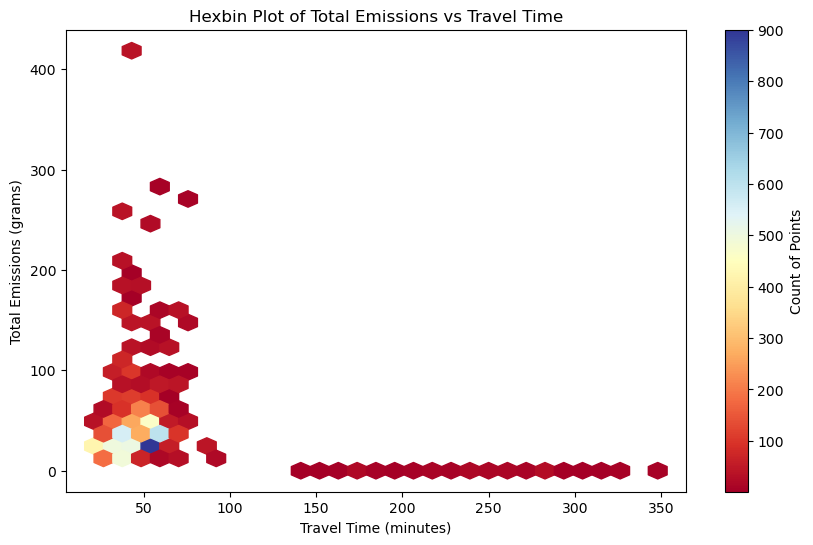

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

hb = plt.hexbin(trip_emissions["travel time (min)"], 
                trip_emissions["Total_emissions_KG"], 
                gridsize=30, 
                cmap="RdYlBu",
               mincnt=1,)

plt.colorbar(hb, label='Count of Points')
plt.xlabel("Travel Time (minutes)")
plt.ylabel("Total Emissions (grams)")
plt.title("Hexbin Plot of Total Emissions vs Travel Time")
plt.show()

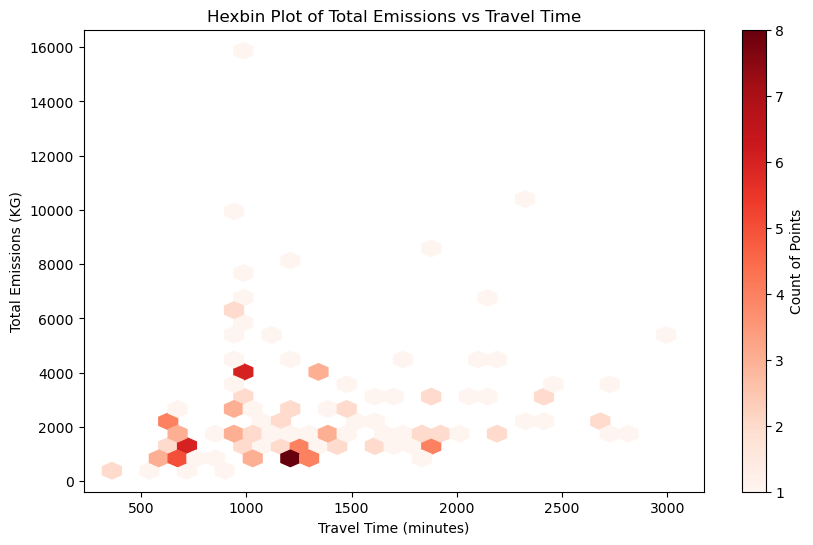

In [116]:
# Create hexbin plot
plt.figure(figsize=(10, 6))

hb = plt.hexbin(
    trip_emissions["travel time (min)"], 
    trip_emissions["Total_Emissions_KG"], 
    gridsize=30, 
    cmap='Reds',
    mincnt=1  # Hide zero-count bins
)

plt.colorbar(hb, label='Count of Points')
plt.xlabel("Travel Time (minutes)")
plt.ylabel("Total Emissions (KG)")
plt.title("Hexbin Plot of Total Emissions vs Travel Time")
plt.show()
